## Ethereum Data Preparation


In [42]:
import numpy as np
import pandas as pd
import hvplot.pandas
from datetime import datetime, date
from functools import reduce

In [46]:
# Load the fear and greed sentiment data for Bitcoin (only fear and greed index)
fng_df = pd.read_csv('fng.csv')
fng_df = fng_df.rename(columns={'date':'Date', 'value_classification':'FNG Class'})
fng_df = fng_df.drop(columns=['value'])
mapping = {'Extreme Fear':'-1.0', 'Fear':'-0.5', 'Neutral':'0.0', 
        'Greed':'0.5', 'Extreme Greed':'1.0'}
fng_df['FNG Class'] = fng_df['FNG Class'].map(mapping)
#display(fng_df.dtypes)
fng_df.tail()

,Date,FNG Class
715,2019-02-01,-1.0
716,2019-01-31,-1.0
717,2019-01-30,-1.0
718,2019-01-29,-1.0
719,2019-01-28,-0.5


In [45]:
# Load the vader sentiment data for Ethereum
eth_vader_df = pd.read_csv('eth_vader.csv', infer_datetime_format=True, parse_dates=True)
eth_vader_df["Publish Date"] = [date[0:10] for date in eth_vader_df["Publish Date"]]
eth_vader_df = eth_vader_df.drop(columns=["Post ID", "Title", "Url", "Author", "Total No. of Comments", "Permalink",
        "title_pos", "title_neu", "title_neg", "title_sent"], axis=1)
eth_vader_df.rename(columns = {'Publish Date':'Date', 'title_compound': 'Vader Compound'}, inplace = True)
# eth_vader_df['Publish Date']=(pd.to_datetime(eth_vader_df['Publish_Date'])) # ,***unit='s'***
#display(eth_vader_df.dtypes)
eth_vader_df.head()

,Score,Date,Vader Compound
0,1,2019-01-24,0.2023
1,1,2019-02-05,0.0000
2,1,2019-02-06,-0.5859
3,1,2019-02-13,0.0000
4,1,2019-02-13,0.0000


In [31]:
# Load the reddit sentiment data for Ethereum - WE DON'T NEED this but didn't want to erase the code
#eth_reddit_df = pd.read_csv('eth_pushshift.csv', infer_datetime_format=True, parse_dates=True) # , index_col="Publish Date"
#eth_reddit_df = eth_reddit_df.drop(columns=["Post ID", "Title", "Url", "Author", "Total No. of Comments", "Permalink"], axis=1)
# eth_reddit_df['Publish Date']=(pd.to_datetime(eth_vader_df['Publish_Date'])) # ,***unit='s'***
#eth_reddit_df.rename(columns = {'Score':'Date', 'Publish Date':'Reddit Score'}, inplace = True)
#eth_reddit_df.reset_index(drop=True, inplace=True)
#eth_reddit_df.set_index('Date') 
#eth_reddit_df.head()

In [32]:
# Load the historical closing prices for Ethereum
eth_close_df = pd.read_csv('ethprices.csv')
eth_close_df = eth_close_df.sort_index()
eth_close_df = eth_close_df.rename(columns={'date':'Date', 'close':'Close Price'})
eth_close_df = eth_close_df.drop(["symbol", "volume"], axis=1)
#display(eth_close_df.dtypes)
eth_close_df.head()

,Date,Close Price
0,2019-01-28,105.43
1,2019-01-29,104.01
2,2019-01-30,107.50
3,2019-01-31,105.74
4,2019-02-01,105.69


In [36]:
# Load the exponential weighted moving average data for Ethereum
eth_ewm_df = pd.read_csv('eth_ema.csv')
eth_ewm_df = eth_ewm_df.sort_index()
eth_ewm_df = eth_ewm_df.rename(columns={'date':'Date', 'crossover_signal':'EWM Cross Signal'})
eth_ewm_df = eth_ewm_df.drop(["symbol", "close", "volume", "daily_return", "fast_close", "slow_close", "crossover_long", "crossover_short"], axis=1)
#display(eth_ewm_df.dtypes)
eth_ewm_df.head()

,Date,EWM Cross Signal
0,2019-01-28,0.0
1,2019-01-29,-1.0
2,2019-01-30,1.0
3,2019-01-31,1.0
4,2019-02-01,1.0


In [40]:
# Load the money flow index for Ethereum
eth_mfi_df = pd.read_csv('mfi_eth.csv')
eth_mfi_df = eth_mfi_df.sort_index()
eth_mfi_df = eth_mfi_df.rename(columns={'date':'Date'})
eth_mfi_df = eth_mfi_df.drop(["symbol", "close", "volume", "Buy", "Sell"], axis=1)
eth_mfi_df.head()

,Date,MFI
0,2019-02-11,39.154915
1,2019-02-12,49.826727
2,2019-02-13,43.223912
3,2019-02-14,45.434021
4,2019-02-15,53.559606


In [47]:
# MERGE the closing price, fng, vader, and ewm DataFrames into a single DataFrame
#columns = ['Close', 'EWM Cross Signal', 'Vader Compound', 'FNG Class']
eth_dfs = [eth_close_df, eth_ewm_df, fng_df, eth_mfi_df] # , eth_vader_df
eth_data_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), eth_dfs)
#eth_data_df.rename(columns = {'f0_':'Date', 'f1__x':'Mining Difficulty', 'f1__y': 'Gas Price', 'f1_':'Actual Value' }, inplace = True)
#eth_data_df.columns = columns
eth_data_df.head()

,Date,Close Price,EWM Cross Signal,FNG Class,MFI
0,2019-02-11,119.52,1.0,-0.5,39.154915
1,2019-02-12,121.18,1.0,-0.5,49.826727
2,2019-02-13,120.58,1.0,0.0,43.223912
3,2019-02-14,119.37,1.0,0.0,45.434021
4,2019-02-15,120.48,1.0,-0.5,53.559606


In [48]:
new_df = eth_data_df.merge(eth_vader_df, on = 'Date', how = 'left')
new_df.head(10)

,Date,Close Price,EWM Cross Signal,FNG Class,MFI,Score,Vader Compound
0,2019-02-11,119.52,1.0,-0.5,39.154915,NaN,NaN
1,2019-02-12,121.18,1.0,-0.5,49.826727,NaN,NaN
2,2019-02-13,120.58,1.0,0.0,43.223912,1.0,0.0
3,2019-02-13,120.58,1.0,0.0,43.223912,1.0,0.0
4,2019-02-14,119.37,1.0,0.0,45.434021,NaN,NaN
5,2019-02-15,120.48,1.0,-0.5,53.559606,NaN,NaN
6,2019-02-16,121.51,1.0,-0.5,49.882827,NaN,NaN
7,2019-02-17,132.34,1.0,-0.5,54.383826,NaN,NaN
8,2019-02-18,144.71,1.0,0.5,56.970086,NaN,NaN
9,2019-02-19,142.84,1.0,0.5,44.730030,NaN,NaN


In [49]:
# Load the gas price data for Ethereum
eth_gas_df = pd.read_csv('eth_gas_price.csv')
eth_gas_df = eth_gas_df.sort_index()
eth_gas_df["f0_"] = [date[0:10] for date in eth_gas_df["f0_"]]
eth_gas_df = eth_gas_df.rename(columns={'f0_':'Date'})
eth_gas_df["Date"] = [date(*map(int, date_string.split('-'))) for date_string in eth_gas_df["Date"]]
eth_gas_df.head()

,Date,f1_
0,2020-05-31,2.412045e+16
1,2019-11-04,1.009714e+16
2,2019-07-19,1.411999e+16
3,2019-09-02,1.206192e+16
4,2019-05-24,1.359907e+16


In [54]:
# Load the mining difficulty data for Ethereum
eth_mining_df = pd.read_csv('mining_diff.csv')
eth_mining_df = eth_mining_df.sort_index()
eth_mining_df["f0_"] = [date[0:10] for date in eth_mining_df["f0_"]]
eth_mining_df = eth_mining_df.rename(columns={'f0_':'Date'})
eth_mining_df = eth_mining_df.sort_index()
#eth_mining_df["Date"] = [date(*map(int, date_string.split('-'))) for date_string in eth_mining_df["Date"]]
eth_mining_df.head()

,Date,f1_
0,2019-02-08,11675962921748186482
1,2020-12-07,23435690773987300016
2,2019-01-11,14983853717188636564
3,2020-01-30,13276090712106226622
4,2019-05-15,13118305205057608143


In [55]:
# Load the actual ethereum value (transfers) data for Ethereum (volume of transactions by day)
eth_value_df = pd.read_csv('actual_eth_value.csv') #, index_col="date", infer_datetime_format=True, parse_dates=True)
eth_value_df = eth_value_df.sort_index()
eth_value_df["f0_"] = [date[0:10] for date in eth_value_df["f0_"]]
eth_value_df = eth_value_df.rename(columns={'f0_':'Date'})
eth_value_df["Date"] = [date(*map(int, date_string.split('-'))) for date_string in eth_value_df["Date"]]
eth_value_df.head()

,Date,f1_
0,2019-04-24,3.490000e+24
1,2019-04-03,4.170000e+24
2,2020-08-12,4.200000e+24
3,2020-09-01,6.880000e+24
4,2021-01-17,1.440000e+23


In [17]:
# Merge the mining data into a single DataFrame
dfs = [eth_mining_df, eth_gas_df, eth_value_df]
eth_mining_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
eth_mining_df.rename(columns = {'f0_':'Date', 'f1__x':'Mining Difficulty', 'f1__y': 'Gas Price', 'f1_':'Actual Value' }, inplace = True)
#mining_df['Date']=(pd.to_datetime(eth_vader_df['Date'])) # ,***unit='s'***
eth_mining_df.head()

,Date,Mining Difficulty,Gas Price,Actual Value
0,2019-02-08 00:00:00 UTC,11675962921748186482,6.269617e+15,2.150000e+24
1,2020-12-07 00:00:00 UTC,23435690773987300016,5.521978e+16,2.750000e+24
2,2019-01-11 00:00:00 UTC,14983853717188636564,7.381782e+15,3.890000e+24
3,2020-01-30 00:00:00 UTC,13276090712106226622,5.117951e+15,1.360000e+24
4,2019-05-15 00:00:00 UTC,13118305205057608143,1.377921e+16,4.390000e+24


## Training and Testing

In [7]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [8]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 30

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)

In [9]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test_scaler = y[split:]

In [10]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test_scaler = scaler.transform(y_test_scaler)


In [11]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

---

## Build and Train the LSTM RNN

In this section, you will design a custom LSTM RNN and fit (train) it using the training data.

You will need to:
1. Define the model architecture
2. Compile the model
3. Fit the model to the training data

### Hints:
You will want to use the same model architecture and random seed for both notebooks. This is necessary to accurately compare the performance of the FNG model vs the closing price model. 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [13]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,             #carries the values forward
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [14]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [15]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 30, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [16]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=100, verbose=0)

---

## Model Performance

In this section, you will evaluate the model using the test data. 

You will need to:
1. Evaluate the model using the `X_test` and `y_test` data.
2. Use the X_test data to make predictions
3. Create a DataFrame of Real (y_test) vs predicted values. 
4. Plot the Real vs predicted values as a line chart

### Hints
Remember to apply the `inverse_transform` function to the predicted and y_test values to recover the actual closing prices.

In [17]:
# Evaluate the model
model.evaluate(X_test, y_test_scaler)

5/5 [==============================] - 1s 6ms/step - loss: 0.0063


0.0063463118858635426

In [18]:
# Make some predictions
predicted = model.predict(X_test)

In [19]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_scaler.reshape(-1, 1))

In [20]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
2019-02-26,3845.510010,3825.088867
2019-02-27,3817.879883,3856.562744
2019-02-28,3830.719971,3879.944824
2019-03-01,3823.370117,3895.461670
2019-03-02,3831.479980,3903.880371


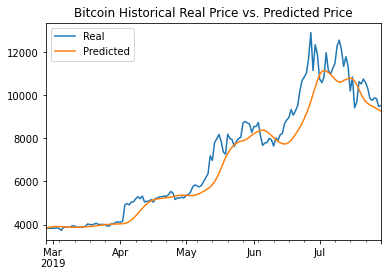

In [21]:
# Plot the real vs predicted values as a line chart
stocks.plot.line(legend=True, title="Bitcoin Historical Real Price vs. Predicted Price")